# Spacy NLP Tokening exercise for analysing the Government Parties in Deutschland

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from dateutil import parser
from spacy.lang.de import German
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from pandas_profiling import ProfileReport

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Download vom Deutschen Sprachpaket im Terminal:
    
    $ python -m spacy download de_core_news_sm



In [4]:
#! pip install -U pip setuptools wheel

In [5]:
#! pip install -U spacy

In [6]:
#! python -m spacy download de_core_news_sm

In [7]:
#! python -m spacy download en_core_web_sm

In [8]:
import spacy
nlp = spacy.load("de_core_news_sm")

### Laden Datensatz  Reden des Bundespräsidenten

Bitte die Datei 'Bundespräsidenten.xml' im gleichen Ordner speichern, in dem sich das Notebook befindet.

Zur Hilfe bekommen Sie folgenden Code, mit dem Sie die Daten einlesen können.

**Aufgabe:**
Ergänzen Sie die Abfrage, indem Sie noch den Titel der Rede, an welchen Tag die Rede gehalten wurden und an welchem Ort dies geschehen ist.

In [9]:
import os
import xmltodict

DATASET = 'Bundespräsidenten.xml'
xml_path = os.path.join(DATASET) 
with open(xml_path, mode="rb") as file:
    xml_document = xmltodict.parse(file)
    text_nodes = xml_document['collection']['text']
    df = pd.DataFrame({'person' : [t['@person'] for t in text_nodes],                          
                       'speech' : [t['rohtext'] for t in text_nodes]})

### EDA

Führen Sie zuerst eine EDA durch. Beantworten Sie mindestens folgende Fragen:

* Wieviel Präsidenten sind dort erwähnt?
* Wieviel Reden an welcher Präsident gehalten?
* An welchen 3 Orte wurden die meisten Reden gehalten? (Bitte in der Analyse (also temporär) die leeren Einträge nicht betrachten)
* Wieviel Reden wurden pro Jahr und pro Präsident durchgeführt? Welcher Präsident hat die meisten Reden in einem Jahr gehalten?
* In welchem Monaten wurden die meisten und die wenigsten Reden gehalten?
* Wie lang sind die Reden. Gibt es eine Tendenz, welcher Präsident eher lange bzw. kurze Reden gehalten hat?
* Wer hat die längste Rede gehalten, wann und worüber?

In [10]:
df.shape

(2045, 2)

# Question 1

#### Wieviel Präsidenten sind dort erwähnt?

## 6 Präsidenten

| Name Of Präsident |
|---|
| Joachim Gauck |
| Johannes Rau  |
| Horst Köhler  |
| Christian Wulff |
| Roman Herzog|
| Richard von Weizsäcker|

In [11]:
df.person.unique()

array(['Joachim Gauck', 'Horst Köhler', 'Christian Wulff', 'Johannes Rau',
       'Roman Herzog', 'Richard von Weizsäcker'], dtype=object)

# Question 2

#### Wieviel Reden an welcher Präsident gehalten?

| Präsident  Name |No. Of Speech |
|---|---|
| Joachim Gauck | 588 |
| Johannes Rau  | 568 |
| Horst Köhler  | 528 |
| Christian Wulff |204 |
| Roman Herzog|134 |
| Richard von Weizsäcker|23|

In [12]:
df.person.value_counts()

Joachim Gauck             588
Johannes Rau              568
Horst Köhler              528
Christian Wulff           204
Roman Herzog              134
Richard von Weizsäcker     23
Name: person, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  2045 non-null   object
 1   speech  2045 non-null   object
dtypes: object(2)
memory usage: 32.1+ KB


In [14]:
prof = ProfileReport(df)
prof.to_file(output_file='Reden des Bundespräsidenten_output.html')

Datensatz gefunden auf Kaggle.com

| Name |Description |
|---|---|
| Person | Representaive of the Deutsche Government Party |
| Speech | Sentimental Speech and Promises|

#### Number of rows:  2045 
#### Number of columns:  2

# Question 3

#### An welchen 3 Orte wurden die meisten Reden gehalten? (Bitte in der Analyse (also temporär) die leeren Einträge nicht betrachten)

| City Name |No. Of Speech Conducted |
|---|---|
| Berlin| 580 |
| Schloss Bellevue   | 376|
| ?????  | 271|
| Bonn    | 77|
| Hamburg    | 45|

In [15]:
# with open(xml_path, mode="rb") as file:
#     xml_document = xmltodict.parse(file)    
#     text_nodes = xml_document['collection']['text'] 

df["ort1"] = [t['@ort'] for t in text_nodes]
df.drop(['ort1'], axis = 1)
df.rename(columns={"ort1": "ort"}, inplace = True)

In [16]:
df

,person,speech,ort
0,Joachim Gauck,Wie viele Botschafterinnen und Botschafter hab...,Saarbrücken
1,Joachim Gauck,"Besuche sind eine schöne Gelegenheit, Gemeinsa...",Schloss Bellevue
2,Horst Köhler,"Majestät, ich danke Ihnen für Ihre Worte des M...",Madrid
3,Joachim Gauck,Wir wollen heute Abend gedenken. Wir gedenken ...,
4,Horst Köhler,Herzlich willkommen in Schloss Bellevue. Meine...,Berlin
...,...,...,...
2040,Johannes Rau,herzlich willkommen und herzlichen Glückwunsch...,Wiesbaden
2041,Horst Köhler,1836 kaufte die preußische Regierung für statt...,Dresden
2042,Joachim Gauck,Dies ist ein Tag des Respekts und der Dankbark...,Berlin
2043,Christian Wulff,Wir erleben heute eine Premiere. In wenigen Ta...,Schloss Bellevue


In [17]:
df.ort.value_counts().sort_values(ascending = False)

Berlin                        580
Schloss Bellevue              376
                              271
Bonn                           77
Hamburg                        45
                             ... 
Wien                            1
Staatsbibliothek zu Berlin      1
Schloss AugustusburgBrühl       1
Schloss Charlottenburg          1
Den HaagNiederlande             1
Name: ort, Length: 275, dtype: int64

# how to ignore the empty entries in the dataframe and retrerive the exact count

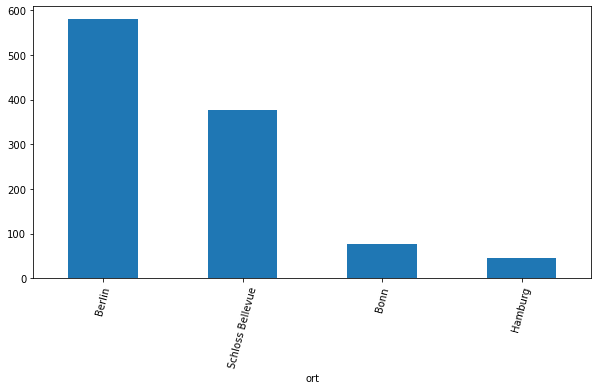

In [18]:
filtering = df['ort'] > ""
ort_max = df.where(filtering).groupby('ort').speech.count().sort_values(ascending = False).head(4)
ort_max.plot(kind = 'bar', figsize = (10,5), rot = 75);

In [19]:
df.loc[~(df["ort"] == "")].groupby("ort").count()["speech"].sort_values(ascending=False).head(10)

ort
Berlin              580
Schloss Bellevue    376
Bonn                 77
Hamburg              45
München              30
Leipzig              30
Köln                 20
Stuttgart            17
Hannover             16
Essen                14
Name: speech, dtype: int64

# Question 4

#### Wieviel Reden wurden pro Jahr und pro Präsident durchgeführt? Welcher Präsident hat die meisten Reden in einem Jahr gehalten?

In [20]:
df["Year_of_Speech"] = [t['@datum'].split('-')[0] for t in text_nodes]
df

,person,speech,ort,Year_of_Speech
0,Joachim Gauck,Wie viele Botschafterinnen und Botschafter hab...,Saarbrücken,2016
1,Joachim Gauck,"Besuche sind eine schöne Gelegenheit, Gemeinsa...",Schloss Bellevue,2014
2,Horst Köhler,"Majestät, ich danke Ihnen für Ihre Worte des M...",Madrid,2009
3,Joachim Gauck,Wir wollen heute Abend gedenken. Wir gedenken ...,,2013
4,Horst Köhler,Herzlich willkommen in Schloss Bellevue. Meine...,Berlin,2009
...,...,...,...,...
2040,Johannes Rau,herzlich willkommen und herzlichen Glückwunsch...,Wiesbaden,2001
2041,Horst Köhler,1836 kaufte die preußische Regierung für statt...,Dresden,2006
2042,Joachim Gauck,Dies ist ein Tag des Respekts und der Dankbark...,Berlin,2015
2043,Christian Wulff,Wir erleben heute eine Premiere. In wenigen Ta...,Schloss Bellevue,2011


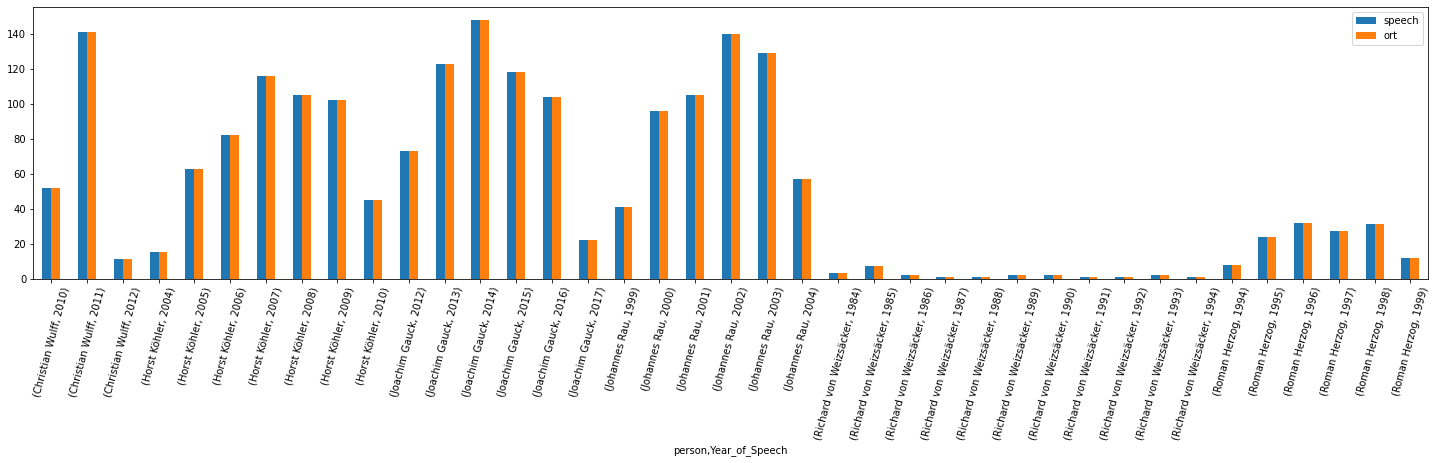

In [21]:
df2 = df.groupby(['person','Year_of_Speech']).count()
df2.plot(kind = 'bar',figsize = (25,5), rot = 75);

In [22]:
print("----------------------------------------------------------------------------------------------------------------")
print("Below is the Yearly List of Total Number Of Speech for each President:")
print("----------------------------------------------------------------------------------------------------------------")
print(df2)
print("----------------------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------------------
Below is the Yearly List of Total Number Of Speech for each President:
----------------------------------------------------------------------------------------------------------------
                                       speech  ort
person                 Year_of_Speech             
Christian Wulff        2010                52   52
                       2011               141  141
                       2012                11   11
Horst Köhler           2004                15   15
                       2005                63   63
                       2006                82   82
                       2007               116  116
                       2008               105  105
                       2009               102  102
                       2010                45   45
Joachim Gauck          2012                73   73
                       2013             

# The President Joachim Gauck had delivered 148 speeches in the Year 2014. 

# The President Richard von Weizsäcker is the least performer in the count of speech delivery.

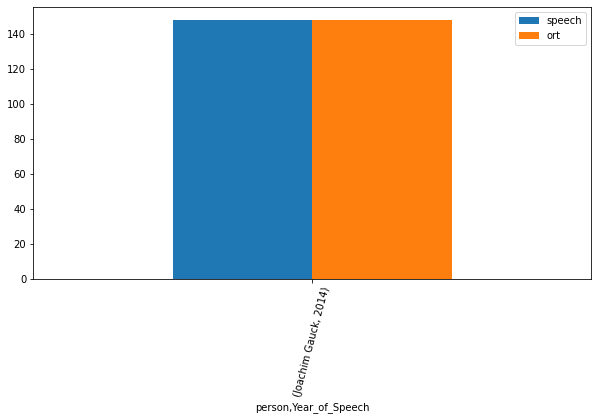

In [23]:
cand_max = df2.loc[df2["speech"] == df2["speech"].max()]
cand_max.plot(kind = 'bar', figsize = (10,5), rot = 75);

In [24]:
cand_min = df2.loc[df2["speech"] == df2["speech"].min()]
cand_min

speech  ort
person                 Year_of_Speech             
Richard von Weizsäcker 1987                 1    1
                       1988                 1    1
                       1991                 1    1
                       1992                 1    1
                       1994                 1    1

# Question 5

#### In welchem Monaten wurden die meisten und die wenigsten Reden gehalten?

### The Maximum no. of Speech was 26; conducted in the Year 2003 in the month of May.

### The Minium no. of Speech was 1; and there are 36 entries with these values between 1984 to 2012

In [25]:
df["Month_of_Speech"] = [t['@datum'].split('-')[1] for t in text_nodes]
df

,person,speech,ort,Year_of_Speech,Month_of_Speech
0,Joachim Gauck,Wie viele Botschafterinnen und Botschafter hab...,Saarbrücken,2016,05
1,Joachim Gauck,"Besuche sind eine schöne Gelegenheit, Gemeinsa...",Schloss Bellevue,2014,02
2,Horst Köhler,"Majestät, ich danke Ihnen für Ihre Worte des M...",Madrid,2009,03
3,Joachim Gauck,Wir wollen heute Abend gedenken. Wir gedenken ...,,2013,11
4,Horst Köhler,Herzlich willkommen in Schloss Bellevue. Meine...,Berlin,2009,12
...,...,...,...,...,...
2040,Johannes Rau,herzlich willkommen und herzlichen Glückwunsch...,Wiesbaden,2001,06
2041,Horst Köhler,1836 kaufte die preußische Regierung für statt...,Dresden,2006,10
2042,Joachim Gauck,Dies ist ein Tag des Respekts und der Dankbark...,Berlin,2015,03
2043,Christian Wulff,Wir erleben heute eine Premiere. In wenigen Ta...,Schloss Bellevue,2011,08


In [26]:
month_cat_min = df.groupby(['Year_of_Speech', 'Month_of_Speech']).speech.count().sort_values(ascending = False).tail(36)
month_cat_min

Year_of_Speech  Month_of_Speech
1993            07                 1
1991            12                 1
1985            07                 1
1990            12                 1
                10                 1
1985            02                 1
1988            12                 1
1989            12                 1
1985            08                 1
1989            05                 1
1984            12                 1
                10                 1
1987            12                 1
1985            12                 1
1986            12                 1
                09                 1
1992            12                 1
1998            11                 1
1993            12                 1
1994            11                 1
2010            06                 1
                07                 1
                08                 1
2012            08                 1
1999            03                 1
1998            08                 1
      

In [27]:
month_cat_max = df.groupby(['Year_of_Speech', 'Month_of_Speech']).speech.count().sort_values(ascending = False)
month_cat_max

Year_of_Speech  Month_of_Speech
2003            05                 26
2011            10                 25
2014            06                 23
2002            06                 21
2003            11                 20
                                   ..
1995            08                  1
                06                  1
                02                  1
                01                  1
1984            07                  1
Name: speech, Length: 282, dtype: int64

# Question 6

#### Wie lang sind die Reden. Gibt es eine Tendenz, welcher Präsident eher lange bzw. kurze Reden gehalten hat?

In [28]:
df["speech_counts"] = df["speech"].apply(lambda x: len(str(x).split(" ")))
df

,person,speech,ort,Year_of_Speech,Month_of_Speech,speech_counts
0,Joachim Gauck,Wie viele Botschafterinnen und Botschafter hab...,Saarbrücken,2016,05,1403
1,Joachim Gauck,"Besuche sind eine schöne Gelegenheit, Gemeinsa...",Schloss Bellevue,2014,02,722
2,Horst Köhler,"Majestät, ich danke Ihnen für Ihre Worte des M...",Madrid,2009,03,669
3,Joachim Gauck,Wir wollen heute Abend gedenken. Wir gedenken ...,,2013,11,707
4,Horst Köhler,Herzlich willkommen in Schloss Bellevue. Meine...,Berlin,2009,12,987
...,...,...,...,...,...,...
2040,Johannes Rau,herzlich willkommen und herzlichen Glückwunsch...,Wiesbaden,2001,06,2132
2041,Horst Köhler,1836 kaufte die preußische Regierung für statt...,Dresden,2006,10,1365
2042,Joachim Gauck,Dies ist ein Tag des Respekts und der Dankbark...,Berlin,2015,03,1958
2043,Christian Wulff,Wir erleben heute eine Premiere. In wenigen Ta...,Schloss Bellevue,2011,08,829


In [29]:
a = df.loc[df["speech_counts"] == df["speech_counts"].max()]
a

,person,speech,ort,Year_of_Speech,Month_of_Speech,speech_counts
1018,Johannes Rau,Johannes Rau:Sehr geehrter Herr Professor Gang...,,2003,03,10114


In [64]:
b= df.loc[df["speech_counts"] == df["speech_counts"].min()]
b

,person,speech,ort,Year_of_Speech,Title_Speech,Month_of_Speech,speech_counts
942,Johannes Rau,"Verehrte Preisträger, meine Damen und Herren,\...",Weimar,1999,,10,87


In [65]:
df.speech[942]

'Verehrte Preisträger, meine Damen und Herren,\nMode lebt vom Wechsel. Mode lebt davon, dass die Produkte, die im nächsten Jahr Menschen faszinieren, anders sind als das, was in diesem Jahr die Menschen fasziniert hat. Das ist eine interessante Entwicklung und Klaus Steilmann könnte viel darüber erzählen; auch darüber, wann Mode wieder kommt, die lange weg war. Der Begriff Mode hat aber genau darum besonders mit Vergänglichkeit zu tun.\nRede von Bundespräsident Johannes Rau anlässlich der Verleihung des Deutschen Umweltpreises in Weimar\nVerehrte Preisträger, meine Damen und Herren,'

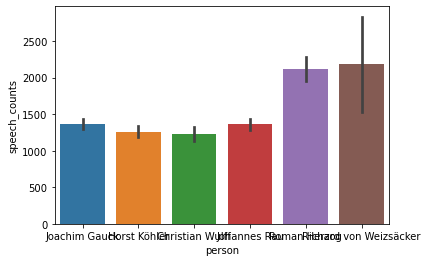

In [30]:
ax = sns.barplot(data = df, x=df["person"], y=df["speech_counts"]);

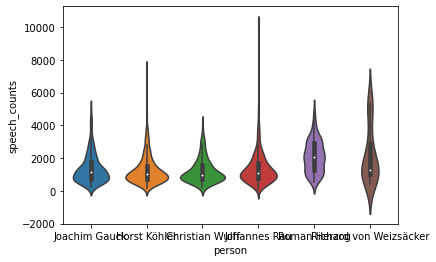

In [31]:
# use to set style of background of plot
#sns.set(style="whitegrid")
ax = sns.violinplot(data=df, x= df["person"], y=df["speech_counts"])

# Another way to create speech lenght with letters count 

### Text EDA mit spaCy

Versuchen Sie den Titel der Reden auf Reden auf Nouns, Verbs und Adjectives zu untersuchen und die Ergebnisse grafisch darzustellen.

In [36]:
df["Title_Speech"] = [t['@untertitel'] for t in text_nodes]
df

,person,speech,ort,Year_of_Speech,Month_of_Speech,speech_counts,Title_Speech
0,Joachim Gauck,Wie viele Botschafterinnen und Botschafter hab...,Saarbrücken,2016,05,1403,Bundespräsident Joachim Gauck hat am 2. Mai be...
1,Joachim Gauck,"Besuche sind eine schöne Gelegenheit, Gemeinsa...",Schloss Bellevue,2014,02,722,Bundespräsident Joachim Gauck hat am 26. Febru...
2,Horst Köhler,"Majestät, ich danke Ihnen für Ihre Worte des M...",Madrid,2009,03,669,
3,Joachim Gauck,Wir wollen heute Abend gedenken. Wir gedenken ...,,2013,11,707,Der Bundespräsident hat am 9. November bei ein...
4,Horst Köhler,Herzlich willkommen in Schloss Bellevue. Meine...,Berlin,2009,12,987,
...,...,...,...,...,...,...,...
2040,Johannes Rau,herzlich willkommen und herzlichen Glückwunsch...,Wiesbaden,2001,06,2132,
2041,Horst Köhler,1836 kaufte die preußische Regierung für statt...,Dresden,2006,10,1365,
2042,Joachim Gauck,Dies ist ein Tag des Respekts und der Dankbark...,Berlin,2015,03,1958,Bundespräsident Joachim Gauck hat am 2. März b...
2043,Christian Wulff,Wir erleben heute eine Premiere. In wenigen Ta...,Schloss Bellevue,2011,08,829,


# Tokenization

In [84]:
# tokenization
nlp = German()
token_list = []
token_lemma = []
my_pos = []
for i in range (0, len(df)):
    my_doc = nlp(str(df.Title_Speech))
    for token in my_doc:        
        token_list.append(token.text)
        token_lemma.append(token.lemma_)
        my_pos.append(token.pos)
print(my_pos)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Part_Of_Speech [POS] Tagging

In [102]:
df5 = df.groupby(["person", "Year_of_Speech"])
df5.head()

,person,speech,ort,Year_of_Speech,Month_of_Speech,speech_counts,Title_Speech
0,Joachim Gauck,Wie viele Botschafterinnen und Botschafter hab...,Saarbrücken,2016,05,1403,Bundespräsident Joachim Gauck hat am 2. Mai be...
1,Joachim Gauck,"Besuche sind eine schöne Gelegenheit, Gemeinsa...",Schloss Bellevue,2014,02,722,Bundespräsident Joachim Gauck hat am 26. Febru...
2,Horst Köhler,"Majestät, ich danke Ihnen für Ihre Worte des M...",Madrid,2009,03,669,
3,Joachim Gauck,Wir wollen heute Abend gedenken. Wir gedenken ...,,2013,11,707,Der Bundespräsident hat am 9. November bei ein...
4,Horst Köhler,Herzlich willkommen in Schloss Bellevue. Meine...,Berlin,2009,12,987,
...,...,...,...,...,...,...,...
1494,Richard von Weizsäcker,Der Deutsche Juristentag hat sich in seiner we...,Berlin,1986,09,5163,
1642,Richard von Weizsäcker,In der Weihnachtsgeschichte beginnt der Engel ...,Bonn,1989,12,1553,
1740,Richard von Weizsäcker,Weihnachten ist das Fest des Friedens. Als Chr...,Bonn,1987,12,1007,
1750,Richard von Weizsäcker,"Zu Weihnachten, liebe Landsleute, feiern Chris...",Bonn,1988,12,992,
